## Calibrated and not calibrated ERT with Boxford dataset
This study has been demonstrated in the EMagPy paper [McLachlan et al. (2021)](https://doi.org/10.1016/j.cageo.2020.104561).

To obtain quantitative EMI measurements, a calibration is needed. One way to perform this calibration is to use an inverted resistivity model from ERT and perform a forward EM model on it. We then match the generated ECa with the ECa measured on the ERT transect (see [Lavoué et al. 2010](https://doi.org/10.3997/1873-0604.2010037)).

The results are shown in the figure below. Smoothly inverted non-calibrated (a) and calibrated (b) EMI data with the corresponding ERT inversion (c). The red line shows the true depth of the peat intrusive penetration measurements.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sys
sys.path.append('../src') # add path where emagpy is
from emagpy import Problem

datadir = '../src/examples/'

letters = ['a','b','c','d','e','f','g','h','i','j']

  0%|          | 0/43 [00:00<?, ?it/s]

Survey 1/1


100%|██████████| 43/43 [00:16<00:00,  2.66it/s]



VCP1.48f10000h1: ECa(ERT) = 0.25 * ECa(EMI) +2.07 (R^2=0.38)
VCP2.82f10000h1: ECa(ERT) = 0.40 * ECa(EMI) +2.33 (R^2=0.48)
VCP4.49f10000h1: ECa(ERT) = 0.48 * ECa(EMI) +1.86 (R^2=0.53)
HCP1.48f10000h1: ECa(ERT) = 0.49 * ECa(EMI) +3.41 (R^2=0.36)
HCP2.82f10000h1: ECa(ERT) = 0.73 * ECa(EMI) +1.55 (R^2=0.54)
HCP4.49f10000h1: ECa(ERT) = 0.59 * ECa(EMI) +1.85 (R^2=0.36)


  0%|          | 0/43 [00:00<?, ?it/s]

VCP1.48f10000h1: ECa(ERT) = 0.25 * ECa(EMI) +2.07 (R^2=0.38)
VCP2.82f10000h1: ECa(ERT) = 0.40 * ECa(EMI) +2.33 (R^2=0.48)
VCP4.49f10000h1: ECa(ERT) = 0.48 * ECa(EMI) +1.86 (R^2=0.53)
HCP1.48f10000h1: ECa(ERT) = 0.49 * ECa(EMI) +3.41 (R^2=0.36)
HCP2.82f10000h1: ECa(ERT) = 0.73 * ECa(EMI) +1.55 (R^2=0.54)
HCP4.49f10000h1: ECa(ERT) = 0.59 * ECa(EMI) +1.85 (R^2=0.36)
Correction is applied.
Survey 1/1


100%|██████████| 43/43 [00:45<00:00,  1.07s/it]


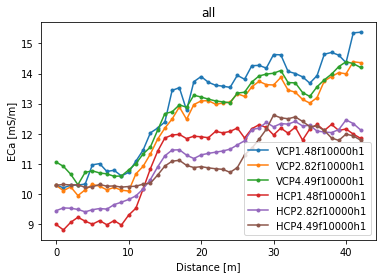

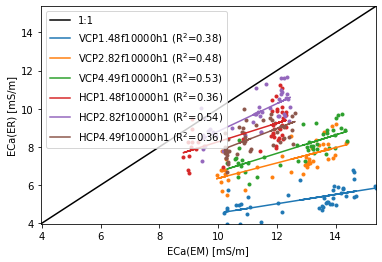

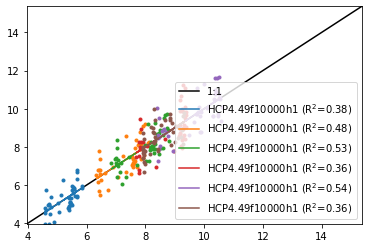

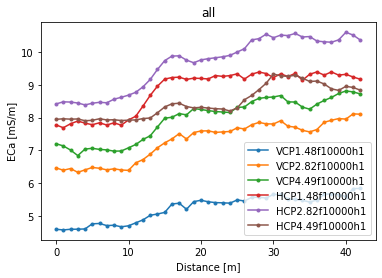

In [25]:
fnameEC = datadir + 'boxford-calib/eri_ec.csv'
fnameECa = datadir + 'boxford-calib/eca_calibration.csv'

# non calibrated
k1 = Problem()
k1.createSurvey(fnameECa)
k1.show()
k1.setInit(depths0=np.arange(0.05, 3, 0.25))
k1.invert(forwardModel='FSlin', alpha=0.01, method='L-BFGS-B', njobs=-1)

# ERT calibrated
k2 = Problem()
k2.createSurvey(fnameECa)
k2.calibrate(fnameECa, fnameEC, forwardModel='FSlin') # plot calibration
k2.calibrate(fnameECa, fnameEC, forwardModel='FSlin', apply=True) # apply the calibration
k2.show()
k2.setInit(depths0=np.arange(0.05, 3, 0.25))
k2.invert(forwardModel='FSlin', alpha=0.001, method='L-BFGS-B', njobs=-1)

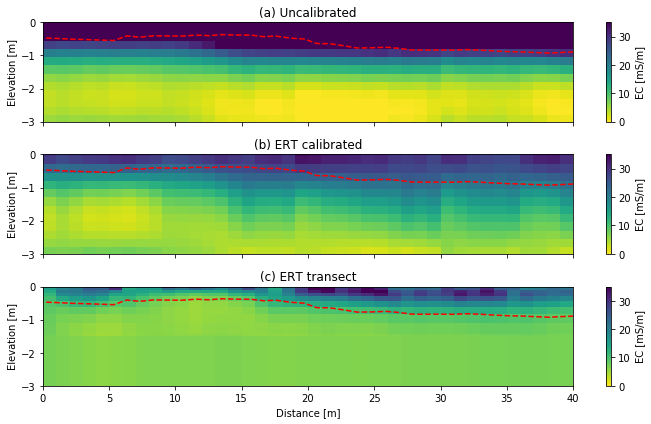

In [26]:
# figure
fig, axs = plt.subplots(3, 1, sharey=True, sharex=True, figsize=(10,6))
peatdepths = pd.read_csv(datadir + 'boxford-calib/peat-depth.dat', sep="\t")
ax = axs[0]
k1.showResults(ax=ax, vmin=0, vmax=35)
ax.plot(peatdepths['distance (m)'], -peatdepths['depth (m)'], 'r--')
ax.set_title('(a) Uncalibrated')
ax.set_xlabel('')
ax = axs[1]
k2.showResults(ax=ax, vmin=0, vmax=35)
ax.plot(peatdepths['distance (m)'], -peatdepths['depth (m)'], 'r--')
ax.set_title('(b) ERT calibrated')
ax.set_xlabel('')
ax = axs[2]
kres = Problem()
kres.importModel(datadir + 'boxford-calib/ert-section.csv')
kres.models[0] = kres.models[0][::4,:] # because taken every 0.25 m
kres.depths[0] = kres.depths[0][::4,:]
kres.showResults(ax=ax, vmin=0, vmax=35, maxDepth=1.5)
ax.set_title('(c) ERT transect')
ax.plot(peatdepths['distance (m)'], -peatdepths['depth (m)'], 'r--')
ax.set_xlim([0, 40])
ax.set_ylim([-3, 0])
ax.set_xlabel('Distance [m]')
ax.set_aspect('auto')
fig.tight_layout()
fig.savefig(outputdir + 'fig10calibrated-inv.jpg', dpi=500)